Nome: Felipe Faustino Brito

Matrícula: 2021007366

# Resposta ao Impulso e Resposta em Frequência

3) Seja um sistema dinâmico representado pela seguinte resposta ao impulso:
h = [2, -5, -3, -1, 1]


Pede-se:

a) Calcular (manualmente) a saída desse sistema para um sinal de entrada x = [1, 2, 3, 1, -1, -2].


Memorial de cálculo:

y[0]=1⋅2= 2

y[1]=1⋅−5+2⋅2=−5+4= −1

y[2]=1⋅−3+2⋅−5+3⋅2=−3−10+6=−7

y[3]=1⋅−1+2⋅−3+3⋅−5+1⋅2=−1−6−15+2=−20

y[4]=1⋅1+2⋅−1+3⋅−3+1⋅−5+(−1)⋅2=1−2−9−5−2=−17

y[5]=2⋅1+3⋅−1+1⋅−3+(−1)⋅−5+(−2)⋅2=2−3−3+5−4=−3

y[6]=3⋅1+1⋅−1+(−1)⋅−3+(−2)⋅−5=3−1+3+10=15

y[7]=1⋅1+(−1)⋅−1+(−2)⋅−3=1+1+6=8

y[8]=(−1)⋅1+(−2)⋅−1=−1+2=1

y[9]=(−2)⋅1=−2

Sinal de saída: y = [2,−1,−7,−20,−17,−3,15,8,1,−2]

b) Calcular (usando o Python) a saída desse sistema para o mesmo sinal do item a.

In [43]:
import numpy as np

# Definir a entrada x e a resposta ao impulso h
x = [1, 2, 3, 1, -1, -2]
h = [2, -5, -3, -1, 1]

# Calcular a convolução de x e h
y = np.convolve(x, h)

print(f"Entrada (x): {x}")
print(f"Resposta ao impulso (h): {h}")
print(f"Sinal de saída: y = {y}")

Entrada (x): [1, 2, 3, 1, -1, -2]
Resposta ao impulso (h): [2, -5, -3, -1, 1]
Sinal de saída: y = [  2  -1  -7 -20 -17  -3  15   8   1  -2]


2) Seja um sistema dinâmico modelado pela seguinte função de transferência:


$$
𝐻(𝑠) = \frac{0,5769z^3−1,731𝑧^2+1,731𝑧−0,5769}{𝑧^3−2,068𝑧^2+1,415𝑧−0,3193}   (fs=10kHz)
$$

a) Verifique sua Resposta em Frequência e estime a amplitude e a fase dos sinais de saída do sistema
quando se aplica na entrada os seguintes sinais:

a1) $$ s1 = cos(2*pi*300*t) $$


In [44]:
import matplotlib.pyplot as plt
from scipy import signal

In [45]:
b = [0.5769, -1.731, 1.731, -0.5769]  # Numerador
a = [1, -2.068, 1.415, -0.3193]        # Denominador

fs = 10000  # Hz

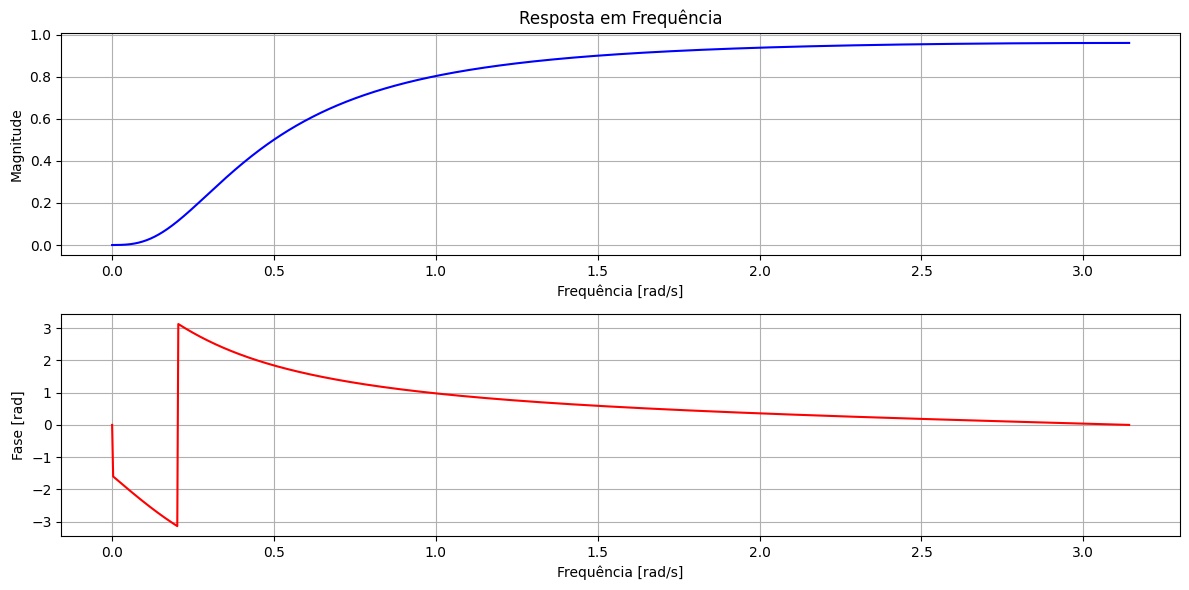

Ganho na frequência de interesse (300 Hz): 0.09648685468488204
Fase na frequência de interesse (300 Hz): -174.9369190831963 graus


In [46]:
f_interest = 300  # Hz

omega_interest = 2 * np.pi * f_interest / fs

omega = np.linspace(0, np.pi, 1000)
w, h = signal.freqz(b, a, worN=omega)

magnitude = np.abs(h)
phase = np.angle(h)


magnitude_interest = np.abs(signal.freqz(b, a, worN=[omega_interest])[1])
phase_interest = np.angle(signal.freqz(b, a, worN=[omega_interest])[1])

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(w, magnitude, 'b')
plt.title('Resposta em Frequência')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, phase, 'r')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [rad]')
plt.grid()

plt.tight_layout()
plt.show()

print(f"Ganho na frequência de interesse (300 Hz): {magnitude_interest[0]}")
print(f"Fase na frequência de interesse (300 Hz): {np.degrees(phase_interest[0])} graus")

a2) $$ s1 = 3*cos(2*pi*1500*t+pi/4) $$


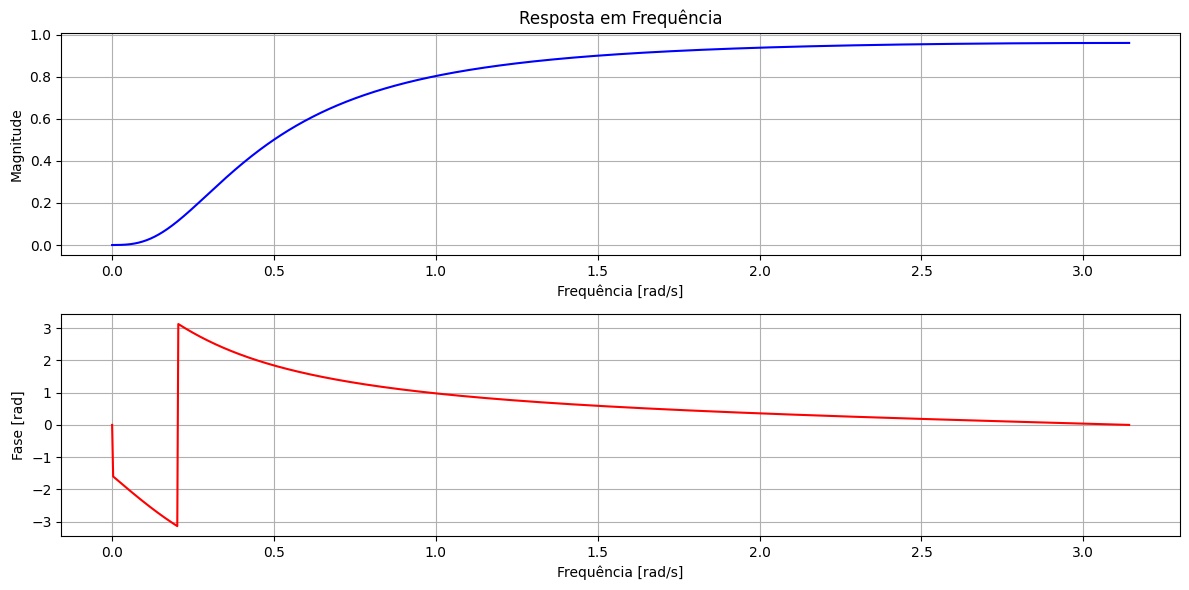

Ganho na frequência de interesse (1500 Hz): 0.7845834848492977
Fase na frequência de interesse (1500 Hz): 59.661911622116726 graus


In [47]:

f_interest = 1500  # Hz

omega_interest = 2 * np.pi * f_interest / fs

omega = np.linspace(0, np.pi, 1000)
w, h = signal.freqz(b, a, worN=omega)

magnitude = np.abs(h)
phase = np.angle(h)

magnitude_interest = np.abs(signal.freqz(b, a, worN=[omega_interest])[1])
phase_interest = np.angle(signal.freqz(b, a, worN=[omega_interest])[1])

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(w, magnitude, 'b')
plt.title('Resposta em Frequência')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, phase, 'r')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [rad]')
plt.grid()

plt.tight_layout()
plt.show()

print(f"Ganho na frequência de interesse (1500 Hz): {magnitude_interest[0]}")
print(f"Fase na frequência de interesse (1500 Hz): {np.degrees(phase_interest[0])} graus")

b) Simule o sistema e confirme a amplitude estimada no item (a).

b1) $$ s1 = cos(2*pi*300*t) $$

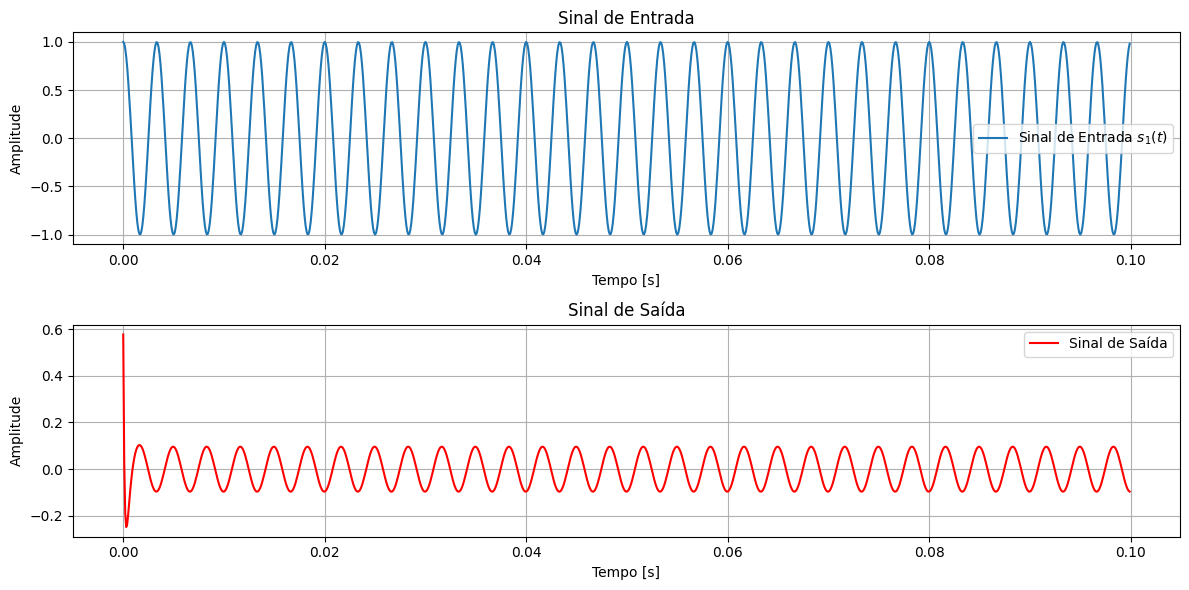

Amplitude média do sinal de saída: 0.06267634096722394


In [48]:
fs = 10000  # Hz
T = 1 / fs  # Período de amostragem
t = np.arange(0, 0.1, T)  # Vetor de tempo (0 a 0.1s)

f_interest = 300  # Hz
omega_interest = 2 * np.pi * f_interest / fs  # Frequência angular normalizada

input_signal = np.cos(2 * np.pi * f_interest * t)

system = signal.dlti(b, a, dt=T)  # Sistema discreto
t_out, output_signal = signal.dlsim(system, input_signal.reshape(-1, 1))


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label='Sinal de Entrada $s_1(t)$')
plt.title('Sinal de Entrada')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_out, output_signal, label='Sinal de Saída', color='red')
plt.title('Sinal de Saída')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

amplitude_output = np.mean(np.abs(output_signal))
print(f"Amplitude média do sinal de saída: {amplitude_output}")

b2) $$ s1 = 3*cos(2*pi*1500*t+pi/4) $$

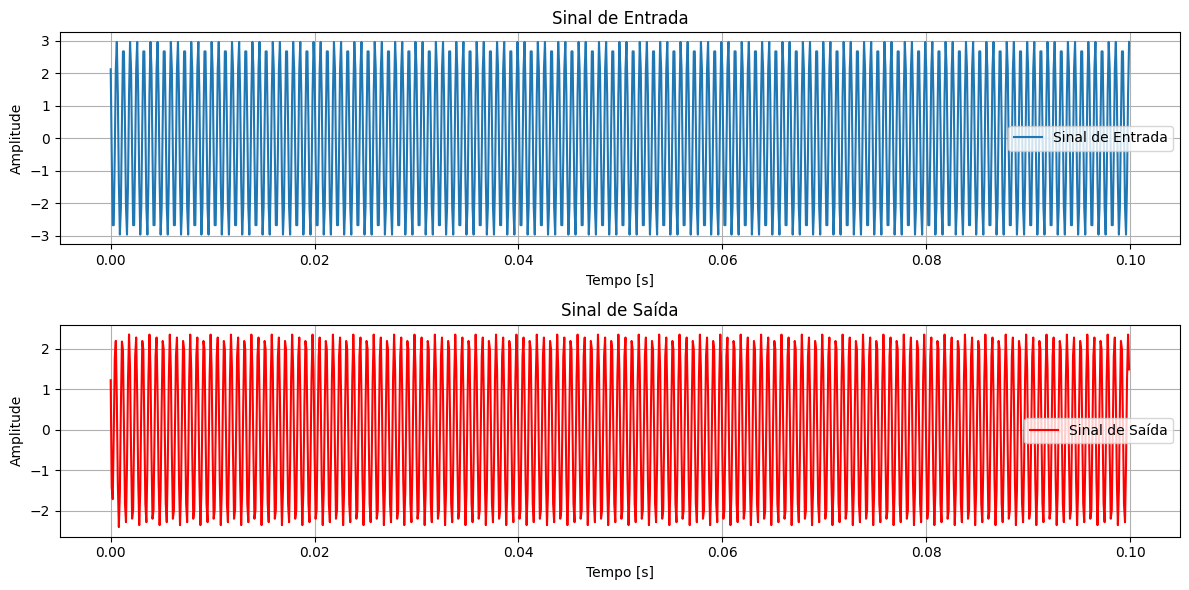

Amplitude média do sinal de saída: 1.4967058573717822


In [49]:
fs = 10000  # Hz
T = 1 / fs  # Período de amostragem
t = np.arange(0, 0.1, T)  # Vetor de tempo (0 a 0.1s)

f_interest = 1500  # Hz
omega_interest = 2 * np.pi * f_interest / fs  # Frequência angular normalizada

input_signal = 3 * np.cos(2 * np.pi * f_interest * t + np.pi / 4)

system = signal.dlti(b, a, dt=T)  # Sistema discreto
t_out, output_signal = signal.dlsim(system, input_signal, t)


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label='Sinal de Entrada')
plt.title('Sinal de Entrada')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_out, output_signal, label='Sinal de Saída', color='red')
plt.title('Sinal de Saída')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


amplitude_output = np.mean(np.abs(output_signal))
print(f"Amplitude média do sinal de saída: {amplitude_output}")